# Question 2: Comparative Analysis of Ranking Algorithms

**Student:** Erfan Shahabi (810103166)

In [1]:
import os
import sys

notebook_dir = os.getcwd()
parent_dir = os.path.dirname(notebook_dir)
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)

print(f"Working directory: {os.getcwd()}")
print(f"Parent directory added: {parent_dir}")

Working directory: /Users/erfan/Documents/University/Social Networks/SN_HW2_810103166/notebooks
Parent directory added: /Users/erfan/Documents/University/Social Networks/SN_HW2_810103166


In [2]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from src.question2 import ranking
from src.question2 import analysis
from src.question2 import stability
from src.question2 import visualization



## Load Data

In [3]:
G = nx.read_edgelist('../data/Wiki-Vote.txt', create_using=nx.DiGraph(), nodetype=int)

print(f"Nodes: {G.number_of_nodes()}")
print(f"Edges: {G.number_of_edges()}")
print(f"Directed: {G.is_directed()}")

print(f"\nAverage in-degree: {sum(dict(G.in_degree()).values())/G.number_of_nodes():.2f}")
print(f"Average out-degree: {sum(dict(G.out_degree()).values())/G.number_of_nodes():.2f}")

if not nx.is_weakly_connected(G):
    print("\nGraph is not weakly connected. Working with largest component...")
    largest_wcc = max(nx.weakly_connected_components(G), key=len)
    G = G.subgraph(largest_wcc).copy()
    print(f"Largest component: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")

Nodes: 7115
Edges: 103689
Directed: True

Average in-degree: 14.57
Average out-degree: 14.57

Graph is not weakly connected. Working with largest component...
Largest component: 7066 nodes, 103663 edges


## Part (a): Ranking Comparison

### 1. Calculate HITS and PageRank

In [4]:
print("Calculating HITS...")
hubs, authorities = ranking.calculate_hits(G)

print("Calculating PageRank (α=0.85)...")
pagerank_scores = ranking.calculate_pagerank(G, alpha=0.85)

print("\nTop 10 by HITS Authority:")
top_auth = sorted(authorities.items(), key=lambda x: x[1], reverse=True)[:10]
for node, score in top_auth:
    print(f"  Node {node}: {score:.6f}")

print("\nTop 10 by PageRank:")
top_pr = sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)[:10]
for node, score in top_pr:
    print(f"  Node {node}: {score:.6f}")

Calculating HITS...
Calculating PageRank (α=0.85)...

Top 10 by HITS Authority:
  Node 2398: 0.002580
  Node 4037: 0.002573
  Node 3352: 0.002328
  Node 1549: 0.002304
  Node 762: 0.002256
  Node 3089: 0.002253
  Node 1297: 0.002250
  Node 2565: 0.002224
  Node 15: 0.002202
  Node 2625: 0.002198

Top 10 by PageRank:
  Node 4037: 0.004624
  Node 15: 0.003693
  Node 6634: 0.003596
  Node 2625: 0.003296
  Node 2398: 0.002618
  Node 2470: 0.002533
  Node 2237: 0.002506
  Node 4191: 0.002276
  Node 7553: 0.002177
  Node 5254: 0.002158


### 2. Ranking Comparison & Visualization

Total nodes: 7066

Rank difference statistics:
count    7066.000000
mean      107.030569
std       230.882303
min         0.000000
25%         2.000000
50%         2.000000
75%        99.750000
max      5516.000000
Name: rank_diff, dtype: float64


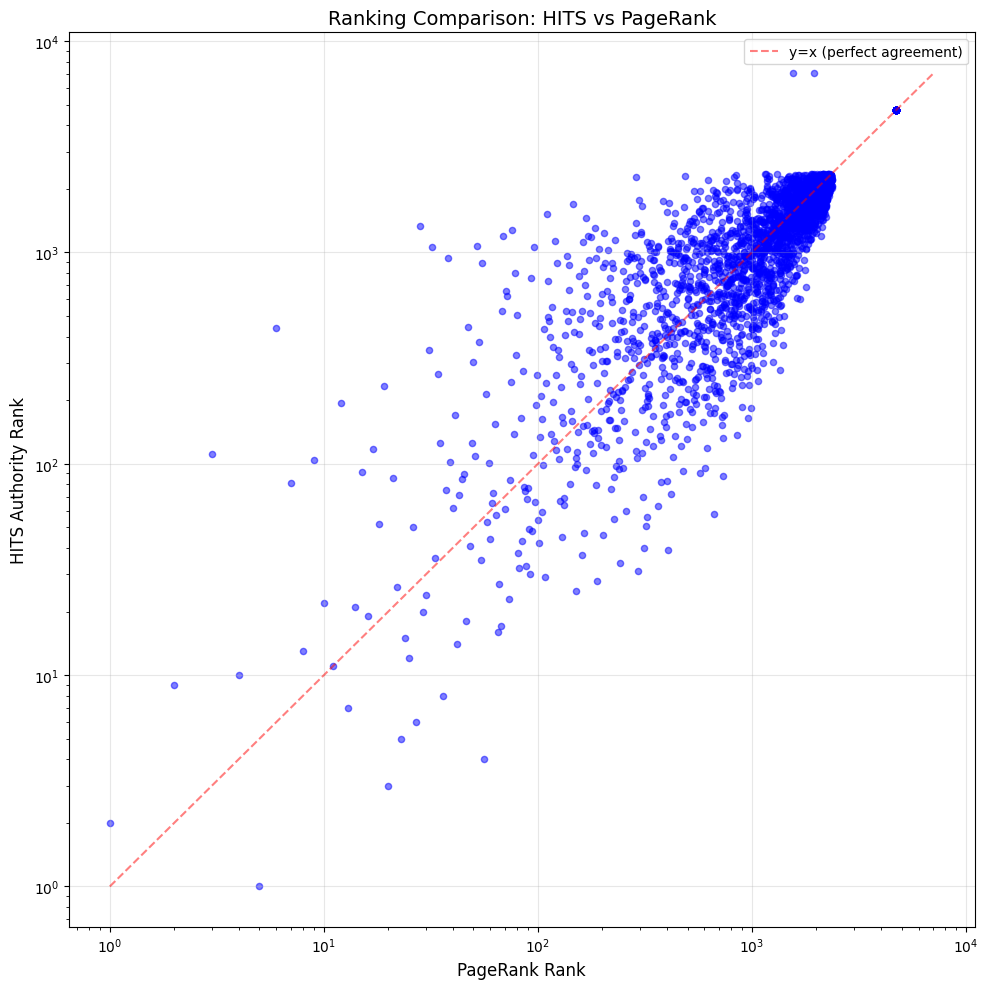


Top 10 nodes with highest agreement (smallest rank difference):
      authority_rank  pagerank_rank  rank_diff
666             11.0           11.0        0.0
1936           602.0          602.0        0.0
694            313.0          313.0        0.0
3584          2038.0         2037.0        1.0
265           2115.0         2114.0        1.0
3888          1919.0         1920.0        1.0
326              2.0            1.0        1.0
1489           419.0          420.0        1.0
489            938.0          937.0        1.0
504            781.0          780.0        1.0

Top 10 nodes with highest divergence:
      authority_rank  pagerank_rank  rank_diff
6708          7066.0         1550.0     5516.0
4320          7065.0         1951.5     5113.5
1122          2271.0          288.0     1983.0
10            2303.0          484.0     1819.0
3193          2199.0          621.0     1578.0
1             1692.0          146.0     1546.0
2189          2325.0          842.0     1483.0
123

In [6]:
comparison = analysis.ranking_comparison(authorities, pagerank_scores)

print(f"Total nodes: {len(comparison)}")
print(f"\nRank difference statistics:")
print(comparison['rank_diff'].describe())

fig = visualization.plot_ranking_comparison_scatter(comparison)
plt.show()

print("\nTop 10 nodes with highest agreement (smallest rank difference):")
print(comparison.nsmallest(10, 'rank_diff')[['authority_rank', 'pagerank_rank', 'rank_diff']])

print("\nTop 10 nodes with highest divergence:")
print(comparison.nlargest(10, 'rank_diff')[['authority_rank', 'pagerank_rank', 'rank_diff']])

### 3. Divergence Analysis

In [13]:
divergent_nodes = analysis.identify_divergent_nodes(comparison, threshold_percentile=95)

print(f"Identified {len(divergent_nodes)} divergent nodes (top 5% rank difference)\n")

print("Analyzing structural properties of divergent nodes...\n")

for idx, row in divergent_nodes.head(5).iterrows():
    node = int(row['node'])
    
    if node not in G.nodes():
        print(f"Node {node}: Not in graph (skipping)\n")
        continue
    
    in_deg = G.in_degree(node)
    out_deg = G.out_degree(node)
    
    print(f"Node {node}:")
    print(f"  Authority Rank: {row['authority_rank']:.0f}")
    print(f"  PageRank Rank: {row['pagerank_rank']:.0f}")
    print(f"  Rank Difference: {row['rank_diff']:.0f}")
    print(f"  In-degree: {in_deg}")
    print(f"  Out-degree: {out_deg}")
    print(f"  In/Out ratio: {in_deg/max(out_deg,1):.2f}")
    


Identified 356 divergent nodes (top 5% rank difference)

Analyzing structural properties of divergent nodes...

Node 7986:
  Authority Rank: 7066
  PageRank Rank: 1550
  Rank Difference: 5516
  In-degree: 1
  Out-degree: 0
  In/Out ratio: 1.00
Node 3591:
  Authority Rank: 7065
  PageRank Rank: 1952
  Rank Difference: 5114
  In-degree: 1
  Out-degree: 13
  In/Out ratio: 0.08
Node 2185:
  Authority Rank: 2271
  PageRank Rank: 288
  Rank Difference: 1983
  In-degree: 10
  Out-degree: 0
  In/Out ratio: 10.00
Node 108:
  Authority Rank: 2303
  PageRank Rank: 484
  Rank Difference: 1819
  In-degree: 11
  Out-degree: 2
  In/Out ratio: 5.50
Node 3201:
  Authority Rank: 2199
  PageRank Rank: 621
  Rank Difference: 1578
  In-degree: 4
  Out-degree: 0
  In/Out ratio: 4.00


## Part (b): Rank Stability Analysis

### 1. PageRank Sensitivity to α

In [9]:
alpha_values = np.linspace(0.50, 0.85, 8)

print(f"Running PageRank sensitivity analysis for α values: {alpha_values}\n")

sensitivity_results = stability.pagerank_sensitivity_analysis(G, alpha_values)

print("Sensitivity analysis complete!")
print(f"Results shape: {sensitivity_results.shape}")
print(f"\nColumns: {list(sensitivity_results.columns)}")

Running PageRank sensitivity analysis for α values: [0.5  0.55 0.6  0.65 0.7  0.75 0.8  0.85]

Sensitivity analysis complete!
Results shape: (7066, 17)

Columns: ['node', 'score_0.50', 'rank_0.50', 'score_0.55', 'rank_0.55', 'score_0.60', 'rank_0.60', 'score_0.65', 'rank_0.65', 'score_0.70', 'rank_0.70', 'score_0.75', 'rank_0.75', 'score_0.80', 'rank_0.80', 'score_0.85', 'rank_0.85']


### 2. Rank Trajectories Visualization

Top 10 nodes by average rank:
      node  rank_0.50  rank_0.55  rank_0.60  rank_0.65  rank_0.70  rank_0.75  \
326   4037        1.0        1.0        1.0        1.0        1.0        1.0   
409     15        2.0        2.0        2.0        2.0        2.0        2.0   
711   2625        4.0        4.0        3.0        3.0        3.0        3.0   
686   2470        3.0        3.0        4.0        4.0        5.0        5.0   
1332  6634        6.0        6.0        6.0        5.0        4.0        4.0   
656   2237        5.0        5.0        5.0        6.0        6.0        6.0   
905   2398        8.0        8.0        8.0        7.0        7.0        7.0   
488   1186        7.0        7.0        7.0        8.0        8.0        9.0   
1141  4191        9.0        9.0        9.0        9.0        9.0        8.0   
3     5254       10.0       10.0       10.0       10.0       10.0       10.0   

      rank_0.80  rank_0.85  
326         1.0        1.0  
409         2.0        2.0  
71

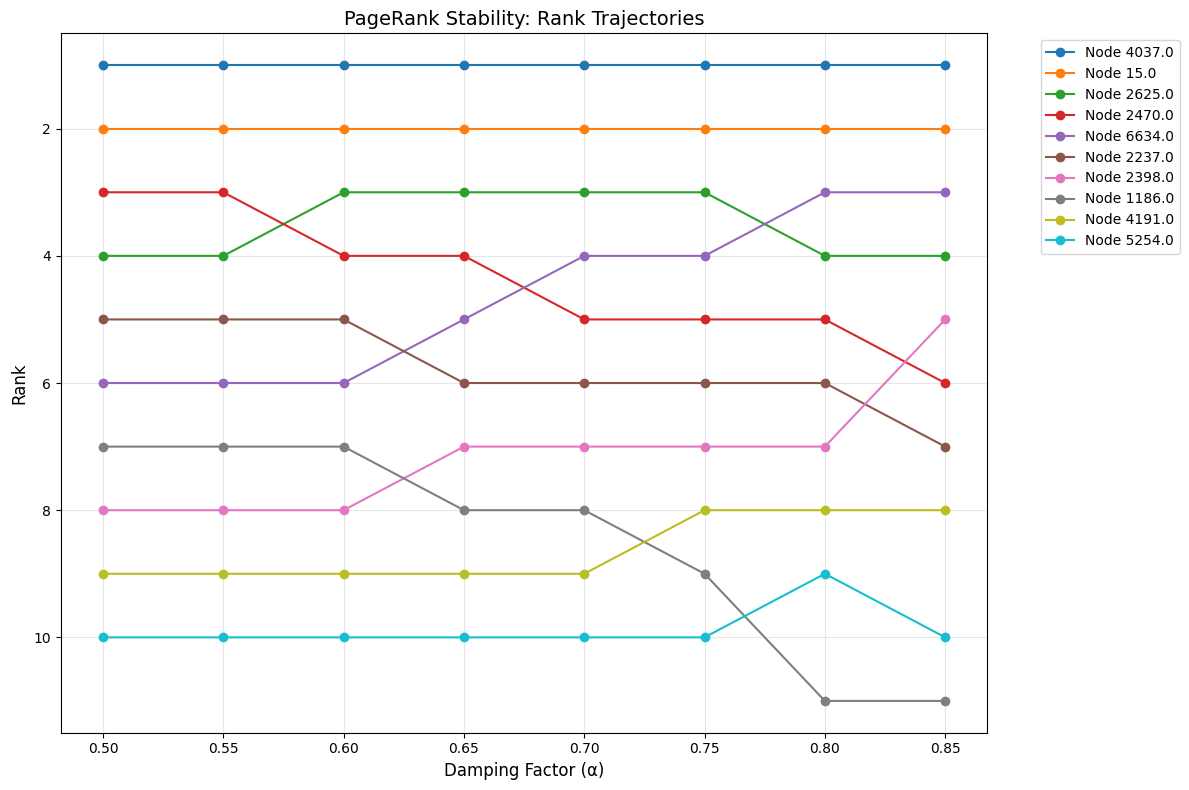

In [10]:
trajectories = stability.analyze_rank_trajectories(sensitivity_results, top_n=10)

print("Top 10 nodes by average rank:")
print(trajectories)

fig = visualization.plot_rank_trajectories(trajectories)
plt.show()

### 3. Trajectory Interpretation

In [11]:
rank_cols = [col for col in trajectories.columns if 'rank_' in col]

print("Rank Stability Analysis:\n")

for idx, row in trajectories.iterrows():
    node = row['node']
    ranks = [row[col] for col in rank_cols]
    
    rank_change = ranks[-1] - ranks[0]
    rank_std = np.std(ranks)
    
    print(f"Node {node}:")
    print(f"  Rank at α=0.50: {ranks[0]:.0f}")
    print(f"  Rank at α=0.85: {ranks[-1]:.0f}")
    print(f"  Total change: {rank_change:+.0f}")
    print(f"  Std deviation: {rank_std:.2f}")
    
    if abs(rank_change) < 5:
        print(f"  Stable: Rank largely unaffected by damping factor")
    elif rank_change > 0:
        print(f"  Declining: Benefits from local influence (low α)")
    else:
        print(f"  Improving: Benefits from distributed influence (high α)")
    print()

Rank Stability Analysis:

Node 4037.0:
  Rank at α=0.50: 1
  Rank at α=0.85: 1
  Total change: +0
  Std deviation: 0.00
  Stable: Rank largely unaffected by damping factor

Node 15.0:
  Rank at α=0.50: 2
  Rank at α=0.85: 2
  Total change: +0
  Std deviation: 0.00
  Stable: Rank largely unaffected by damping factor

Node 2625.0:
  Rank at α=0.50: 4
  Rank at α=0.85: 4
  Total change: +0
  Std deviation: 0.50
  Stable: Rank largely unaffected by damping factor

Node 2470.0:
  Rank at α=0.50: 3
  Rank at α=0.85: 6
  Total change: +3
  Std deviation: 0.99
  Stable: Rank largely unaffected by damping factor

Node 6634.0:
  Rank at α=0.50: 6
  Rank at α=0.85: 3
  Total change: -3
  Std deviation: 1.22
  Stable: Rank largely unaffected by damping factor

Node 2237.0:
  Rank at α=0.50: 5
  Rank at α=0.85: 7
  Total change: +2
  Std deviation: 0.66
  Stable: Rank largely unaffected by damping factor

Node 2398.0:
  Rank at α=0.50: 8
  Rank at α=0.85: 5
  Total change: -3
  Std deviation: 0.93


### 4. Sensitivity Heatmap

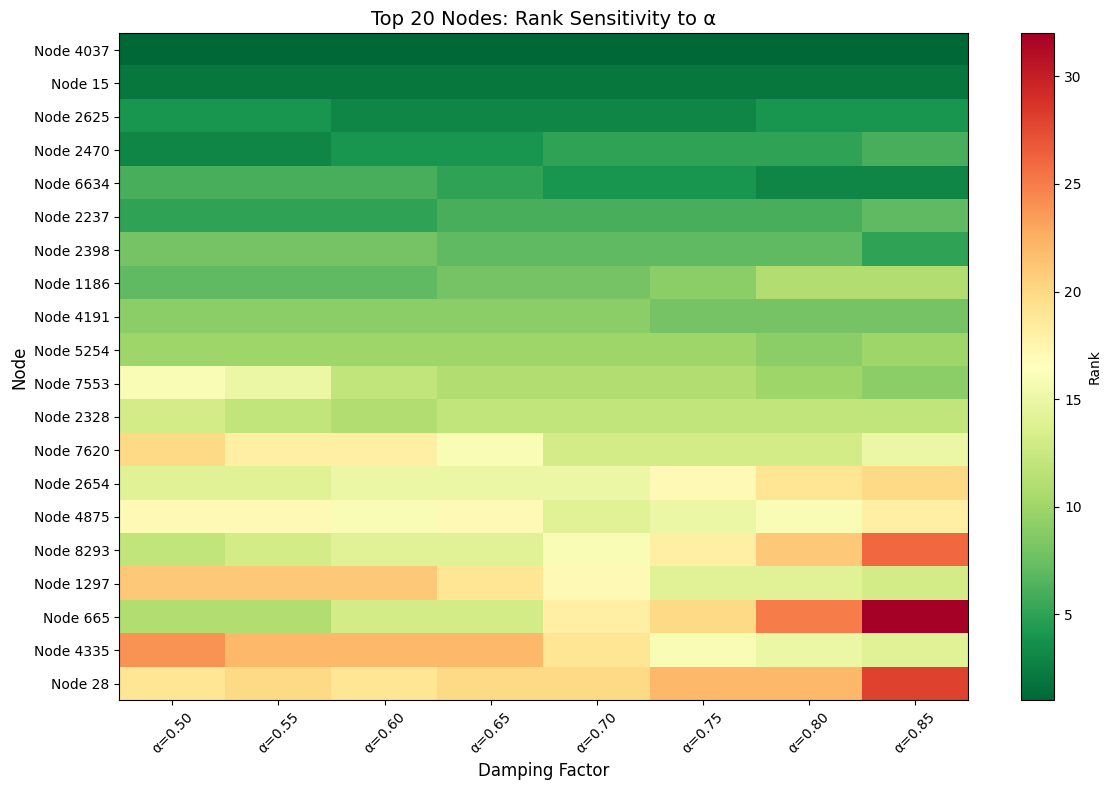

In [12]:
fig = visualization.plot_sensitivity_heatmap(sensitivity_results, top_n=20)
plt.show()